# Розв’язання диференційних рівнянь 1 порядку

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def ExplEuler(h,t0,tn,x0,f):
    """
    Явний метод Ейлера
        
    Arguments:
      h - крок чисельного розв'язання
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
        
    Returnes:
      t - масив часу
      x - масив координат x(t)
      назва метода
    """
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.zeros(n + 1)# заготовка для масиву координати
    x[0] = x0# вносимо початкову умову
    for i in range(n): #і буде мати значення від 0 до n - 1
        x1 = f(t[i], x[i]) # обчислюємо поточну швидкість
        x[i + 1] = x[i] + x1 * h # формула явного методу Ейлера
    return (t, x, 'Explicit Euler Method')


def ImplEuler(h,t0,tn,x0,f):
    """
    Неявний метод Ейлера
        
    Arguments:
      h - крок чисельного розв'язання
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - НЕ функція, що задана дифрівнянням; функція виведена для неявного метода Ейлера
        
    Returnes:
      t - масив часу
      x - масив координат x(t)
      назва метода
    """
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.zeros(n + 1)# заготовка для масиву координати
    x[0] = x0# вносимо початкову умову
    for i in range(n): #і буде мати значення від 0 до n - 1# x1 = f(t[i], x[i]) НЕ обчислюємо поточну швидкість, бо вона для неявного метода не потрібна
        x[i + 1] = f(t[i + 1], x[i], h)# формула НЕявного методу Ейлера
    return (t, x, 'Implicit Euler Method')

def Runge2(h,t0,tn,x0,f):
    """
    Метода Рунге-Кути 2 порядку
        
    Arguments:
      h - крок чисельного розв'язання
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
        
    Returnes:
      t - масив часу
      x - масив координат x(t)
      назва метода
    """
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.zeros(n + 1)# заготовка для масиву координати
    x[0] = x0# вносимо початкову умову
    for i in range(n): #і буде мати значення від 0 до n - 1# обчислюємо предиктори - коректори
        k1 = f(t[i], x[i])
        k2 = f(t[i] + h, x[i] + h * k1)
        x[i + 1] = x[i] + (k1 + k2) * h / 2# формула методу Рунге - Кути 2 порядку
    return (t, x, '2nd order Runge-Kutta Method')

def Runge4(h,t0,tn,x0,f):
    """
    Метод Рунге-Кути 4 порядку
        
    Arguments:
      h - крок чисельного розв'язання
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
        
    Returnes:
      t - масив часу
      x - масив координат x(t)
      назва метода
    """
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.zeros(n + 1)# заготовка для масиву координати
    x[0] = x0# вносимо початкову умову
    for i in range(n): #і буде мати значення від 0 до n - 1# обчислюємо предиктори - коректори
        k1 = f(t[i], x[i])
        k2 = f(t[i] + h / 2, x[i] + h * k1 / 2)
        k3 = f(t[i] + h / 2, x[i] + h * k2 / 2)
        k4 = f(t[i] + h, x[i] + h * k3)
        x[i + 1] = x[i] + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6# формула методу Рунге - Кути 4 порядку
    return (t, x, '4th order Runge-Kutta Method')

def Adams2E(h,t0,tn,x0,f):
    """
    Явний метод Адамса 2 порядку
        
    Arguments:
      h - крок чисельного розв'язання
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
        
    Returnes:
      t - масив часу
      x - масив координат x(t)
      назва метода
    """
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.zeros(n + 1)# заготовка для масиву координати
    x1 = np.zeros(n + 1)# заготовка для масиву похідної
    x[0] = x0# вносимо початкову умову# Робимо перший крок методом Рунге - Кути 2 порядку
    x1[0] = k1 = f(t[0], x[0])
    k2 = f(t[0] + h, x[0] + h * k1)
    x[1] = x[0] + (k1 + k2) * h / 2# формула методу Рунге - Кути 2 порядку
    for i in range(n - 1): #і буде мати значення від 0 до n - 2# коли і = 0 ми обчислюємо 2 ге значення# для цього потрібні 0 та 1 значення похідної# 0 значення вже збережено# обчислимо 1 значення похідної та збережемо його
        x1[i + 1] = f(t[i + 1], x[i + 1])
        x[i + 2] = x[i + 1] + 3 * h / 2 * x1[i + 1] - h / 2 * x1[i]
    return (t, x, '2nd order Adams-Bashforth Method')

def Adams2I(h,t0,tn,x0,f):
    """
    Неявний метод Адамса 2 порядку
        
    Arguments:
      h - крок чисельного розв'язання
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - НЕ функція, що задана дифрівнянням
      це функція виведена для неявного метода Ейлера та для неявного метода Адамса
        
    Returnes:
      t - масив часу
      x - масив координат x(t)
      назва метода
    """
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.zeros(n + 1)# заготовка для масиву координати
    x1 = np.zeros(n + 1)# заготовка для масиву похідної
    x[0] = x0# вносимо початкову умову# Робимо перший крок неявним методом Ейлера
    x1[0] = f(t[0], x[0], 0, 0, 0, 0)# функція дифрівняння
    #0 в кінці - це додаткова змінна, що вказує на те, що тут використати функцію дифрівняння
    x[1]= f(t[0], x[0], h, 0, 0, 1)# формула НЕявного методу Ейлера
    #1 в кінці - це додаткова змінна, що вказує на те, що тут використати неявного Ейлера
    for i in range(n-1): # і буде мати значення від 0 до n - 2# коли і = 0 ми обчислюємо 2 ге значення# для цього потрібні 0 та 1 значення похідної# 0 значення вже збережено# обчислимо 1 значення похідної та збережемо його
        x1[i + 1] = f(t[i + 1], x[i + 1], 0, 0, 0, 0)
        x[i + 2] = f(t[i + 2], x[i + 1], h, x1[i + 1], x1[i], 2)# формула НЕявного методу Адамса
        #2 в кінці - це додаткова змінна, що вказує на те, що тут використати неявного Адамса   
    return (t,x,'2nd order Adams-Moulton Method')

def StabilityAnalysis(Method,H,t0,tn,x0,f,solution):
    """
    аналіз стійкості метода
        
    Arguments:
      Method - назва функції, що задає метод
      H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
      solution - функція, що описує аналітичний розв'язок рівняння
        
    Returnes:
      plot
    """

    for h in H:
        (t, x, name) = Method(h, t0, tn, x0, f)# в змінні(t, x, name) запише масив часу, масив координати та ім 'я методу
        plt.plot(t, x, label = 'h=' + str(h))# print(h)# print(x)
    t = np.arange(t0, tn + 0.01, 0.01)
    x = solution(t)
    xmin = np.min(x) * 0.8
    xmax = np.max(x) * 1.2
    plt.plot(t, x, ':', label = 'Solution')
    plt.grid(True)
    plt.legend()
    plt.xlim(t0, tn)
    plt.ylim(xmin, xmax)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(name + ' different steps')

def Error(Method, H, t0, tn, x0, f, solution):
    """
    дослідження похибки від кроку
        
    Arguments:
      Method - назва функції, що задає метод
      H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
      solution - функція, що описує аналітичний розв'язок рівняння
        
    Returnes:
      plot
    """
    Er = []
    for h in H:
        (t, x, name) = Method(h, t0, tn, x0, f)# x - чисельний розв 'язок
        sol = solution(t)
        er = math.sqrt(np.sum((sol - x) ** 2) / len(sol))
        Er = Er + [er]
    plt.plot(H, Er, label = name)
    plt.grid(True)
    plt.ylim(0, max(Er))
    plt.xlabel('Step h')
    plt.ylabel('Error')
    plt.title('Error dependence on step for ' + name)

def Errorh2(Method,H,t0,tn,x0,f,solution):
    """
    дослідження похибки від кроку МЕТОДОМ ПОДВІЙНОГО ПРОРАХУНКУ
        
    Arguments:
      Method - назва функції, що задає метод
      H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
      solution - функція, що описує аналітичний розв'язок рівняння
        
    Returnes:
      plot
    """
    Er = []
    for h in H:
        (t, x, name) = Method(h, t0, tn, x0, f)# x - чисельний розв 'язок
        sol = Method(h / 2, t0, tn, x0, f)[1]# x - чисельний розв 'язок з кроком вдвічі менше
        sol = [sol[i]
            for i in range(len(sol)) if i % 2 == 0
        ]
        if len(x) != len(sol):
            L = min(len(x), len(sol))
            x = x[: L]
            sol = sol[: L]
        er = math.sqrt(np.sum((sol - x) ** 2) / len(sol))
        Er = Er + [er]
    plt.plot(H, Er, label = name)
    plt.grid(True)
    plt.ylim(0, max(Er))
    plt.xlabel('Step h')
    plt.ylabel('Error')
    plt.title('Error dependence on step for ' + name + '\n halved step')

def Errors(Method,H,t0,tn,x0,f,solution):
    """
    дослідження взаємозв'язку похибок різними методиками
        
    Arguments:
      Method - назва функції, що задає метод
      H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
      t0 - початковий час, не обов'язково дорівнює 0
      tn - кінцевий час
      x0=x(t0) - задана початкова умова
      f - функція, що задана дифрівнянням
      solution - функція, що описує аналітичний розв'язок рівняння
        
    Returnes:
      plot
    """
    Er = []
    Erh2 = []
    for h in H:
        (t, x, name) = Method(h, t0, tn, x0, f)# x - чисельний розв 'язок
        sol = solution(t)
        er = math.sqrt(np.sum((sol - x) ** 2) / len(sol))
        Er = Er + [er]
        sol = Method(h / 2, t0, tn, x0, f)[1]# x - чисельний розв 'язок з кроком вдвічі менше
        sol = [sol[i]
            for i in range(len(sol)) if i % 2 == 0
        ]
        if len(x) != len(sol):
            L = min(len(x), len(sol))
            x = x[: L]
            sol = sol[: L]
        er = math.sqrt(np.sum((sol - x) ** 2) / len(sol))
        Erh2 = Erh2 + [er]
    kof = round(sum([Er[i] / Erh2[i]
        for i in range(len(Er))
    ]) / len(Er), 3)
    plt.plot(Erh2, Er, label = 'Error dependence')
    plt.plot(Erh2, Erh2, label = 'y=x')
    plt.grid(True)
    plt.legend()
    plt.ylim(0, max(Er))
    plt.xlabel('Halved step error')
    plt.ylabel('Error')
    plt.title('Error dependence on halved step error\n' + name + '\nEr/Erh2=' + str(kof))

## Умова задачі
Варіант 12
Розв’язати задане згідно з варіантом у таблиці 1 рівняння аналітично та чисельно усіма 5 методами (явний та неявний метод Ейлера, метод Рунге-Кути, явний та неявний двохточковий метод Адамса). Проаналізувати стійкість та точність кожного метода.
$$ x'(t) = (1+x^2)e^{t} $$
$$ x(0) = 2, t \in [0;2] $$
## Аналітичний розв'язок
$$ \frac{dx}{dt} = (1+x^2)e^{t}$$
$$ \frac{dx}{(1+x^2)} = e^{t}dt$$
$$ arctg(x) = e^{t} + c, x(0) = 2$$
### Розв'язок
$$ x(t) = tg(e^{t} + c), c = arctg(2) - 1 \approx 0.1071$$
Помітимо, що розв'язок містить точку розриву, коли значення під такненсом наближається до $\frac{\pi}{2}$, що відбувається при $t = ln(\frac{\pi}{2} - (arctg(2) - 1))$. Тому, якщо запустити методи на всьому інтервалі наближений розв'язок продовжує зростати  відносно попередніх значень і продовжує прямувати до нескінченості, хоча мав би зменшитись до мінус нескінченості і зростати

In [2]:
# Точка розриву
np.log(np.pi / 2 - (np.arctan(2) - 1))

0.380931682330784

In [3]:
# Дані задачі: 
(t0, tn, x0) = (0, 0.35, 2)

#Дифрівняння
def equation1(t,x):
    return (1+x**2) * np.exp(t)
# Аналітичний розв'язок
def solution1(t):
    c = np.arctan(2) - 1
    return np.tan(np.exp(t) + c)

#Кроки для стійкості
H1=(0.005, 0.01, 0.05, 0.1, 0.25, 0.5)
#Дуже маленькі кроки для стійкості
H1_2=(0.00002, 0.0002, 0.002)

#Кроки для похибки
H2=np.arange(0.002,0.1+0.002,0.002)
#Дуже маленькі кроки для похибки
H2_2=np.arange(0.000002, 0.002, 0.00002)

# Аналіз стійкості та точності методів

In [4]:
# Setup for ploting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

### Явний метод Ейлера

C:\Users\kam\AppData\Local\Temp/ipykernel_3324/3116252603.py:6: RuntimeWarning: overflow encountered in double_scalars
  return (1+x**2) * np.exp(t)
C:\Users\kam\AppData\Local\Temp/ipykernel_3324/3116252603.py:6: RuntimeWarning: overflow encountered in double_scalars
  return (1+x**2) * np.exp(t)
C:\Users\kam\AppData\Local\Temp/ipykernel_3324/3116252603.py:6: RuntimeWarning: overflow encountered in double_scalars
  return (1+x**2) * np.exp(t)
C:\Users\kam\AppData\Local\Temp/ipykernel_3324/3116252603.py:6: RuntimeWarning: overflow encountered in double_scalars
  return (1+x**2) * np.exp(t)


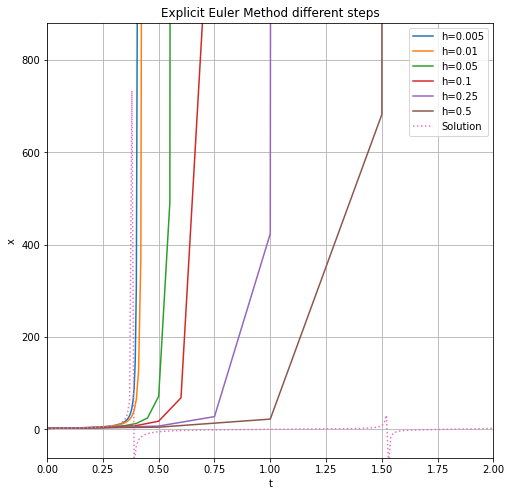

In [5]:
# Наближений розв'язок на всьому інтервалі
tabilityAnalysis(ExplEuler, H1, t0, 2, x0, equation1, solution1)

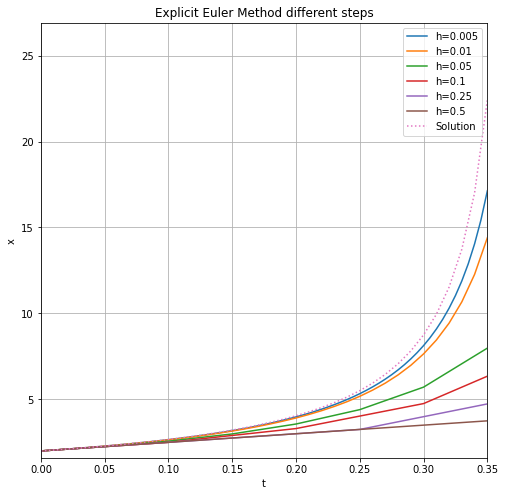

In [6]:
# Наближений розв'язок на урізаному інтервалі
StabilityAnalysis(ExplEuler, H1, t0, tn, x0, equation1, solution1)

Помітимо, що через точку розриву метод Ейлера працює не надто гарно і значно відрізняється від розв'язку. Сам же код попереджає про перебільшення допустимих значень. Тому надалі проведемо аналіз на інтервалі, який не містить розриву, а саме при $ t \in [0;0.35] $

In [8]:
# Дані задачі: 
(t0, tn, x0) = (0, 0.35, 2)

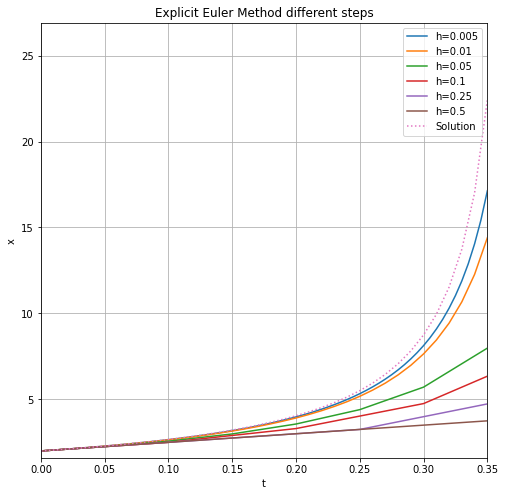

In [9]:
StabilityAnalysis(ExplEuler, H1, t0, tn, x0, equation1, solution1)

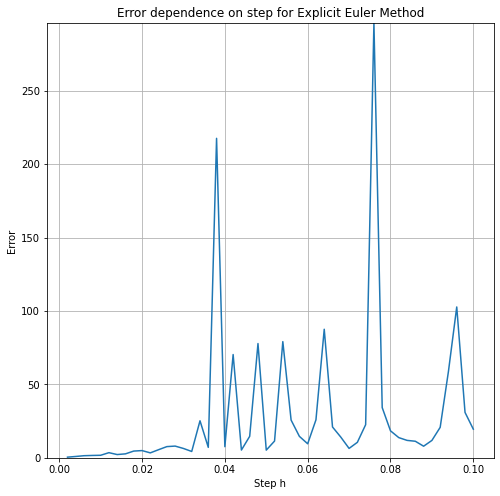

In [10]:
Error(ExplEuler, H2, t0, tn, x0, equation1, solution1)

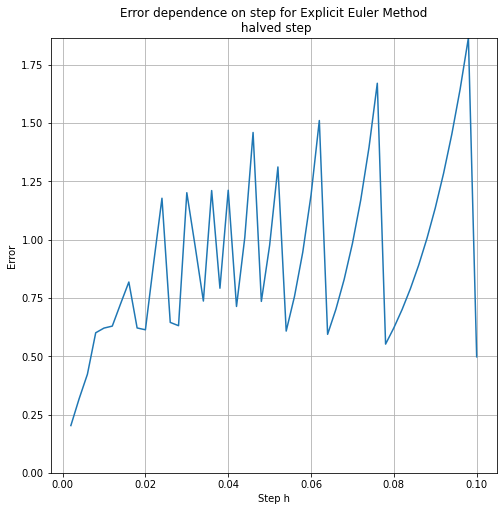

In [11]:
Errorh2(ExplEuler, H2, t0, tn, x0, equation1, solution1)

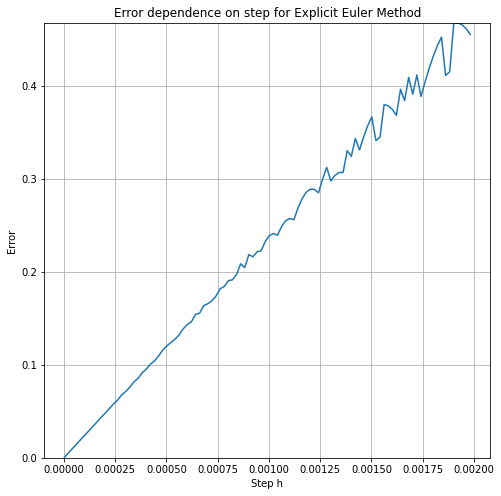

In [12]:
Error(ExplEuler, H2_2, t0, tn, x0, equation1, solution1)

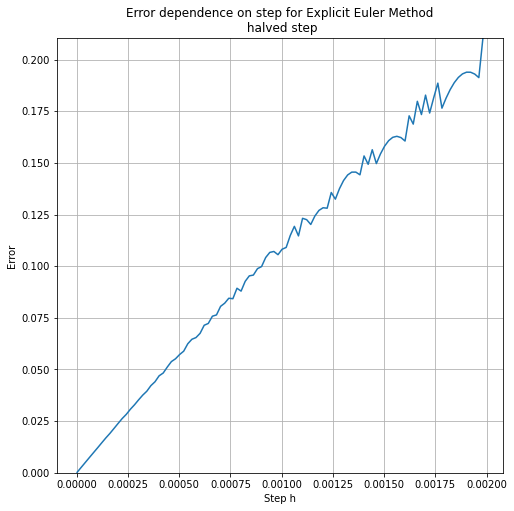

In [13]:
Errorh2(ExplEuler, H2_2, t0, tn, x0, equation1, solution1)

Підбором бачимо, що похибки ведуть себе лінійно при маленьких кроках (до 0.002), проте вони осцилюють по мірі збільшення кроку. Це може говорити про нестійкість розв'язку.

### Неявний метод Ейлера
$$ x'(t) = (1+x^2)e^{t} $$
$$ x(0) = 2, t \in [0;2] $$
#### Формула для неявного метода Ейлера
$$ x_{k+1} = x_{k} + h(1+x_{k+1}^2)e^{t_{k+1}}$$
$$ he^{t_{k+1}}x_{k+1}^2 - x_{k+1} + (x_{k} + he^{t_{k+1}}) = 0$$
$$ x_{k+1} = \frac{1 - \sqrt{1-4he^{t_{k+1}}(x_{k} + he^{t_{k+1}})}}{2he^{t_{k+1}}}$$
Бачимо, що в нашому випадку існує проблема із коренем, адже при певних значеннях значення під коренем будуть від'ємними, що викличе помилку. Тому з метою отримати хоча якийсь результат під коренем було добавлено модуль.

In [14]:
# Дані задачі: 
(t0, tn, x0) = (0, 0.35, 2)

#Робоча формула для неявного Ейлера
def equation1ImplEuler(t,x,h):
    u = h*np.exp(t)
    return (1 - np.sqrt((1-4*u*(x+u))))/(2*u) 

C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)


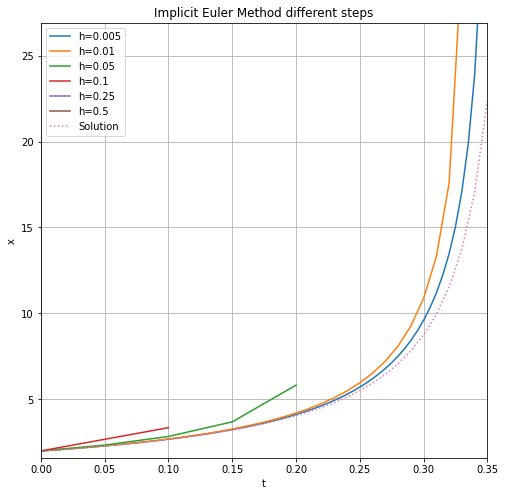

In [15]:
StabilityAnalysis(ImplEuler, H1, t0, tn, x0, equation1ImplEuler, solution1)

C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)


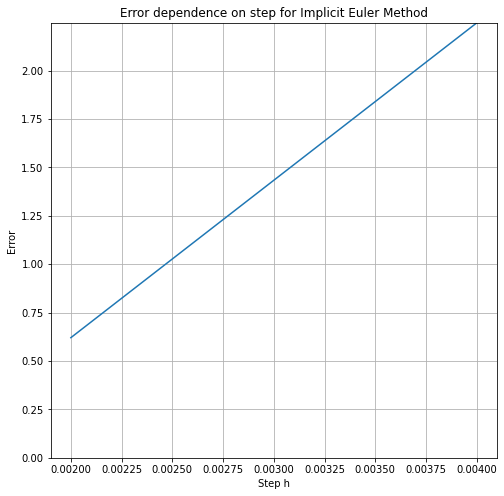

In [16]:
Error(ImplEuler, H2, t0, tn, x0, equation1ImplEuler, solution1)

C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)


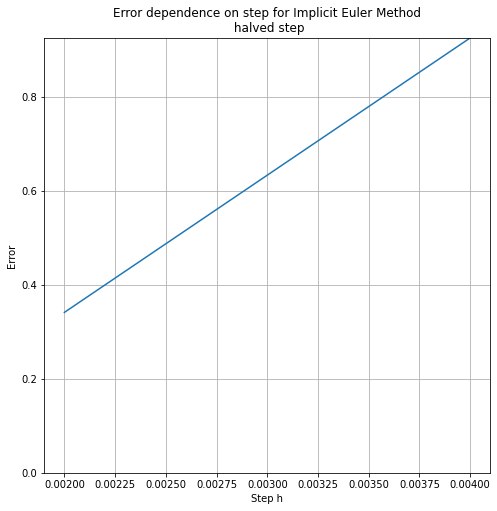

In [17]:
Errorh2(ImplEuler, H2, t0, tn, x0, equation1ImplEuler, solution1)

Бачимо, що в цілому алгоритм більш стійкий у порівнянні із явним методом Ейлера і більш точний, що видно із графіків похибок. Проте суттєвим недоліком методу є необхідність розв'язувати рівняння, а в нашому випадку виникає проблема із коренем, що відповідно обмежує застосування методу. 

### Метод Рунге-Кути 2-гого порядку

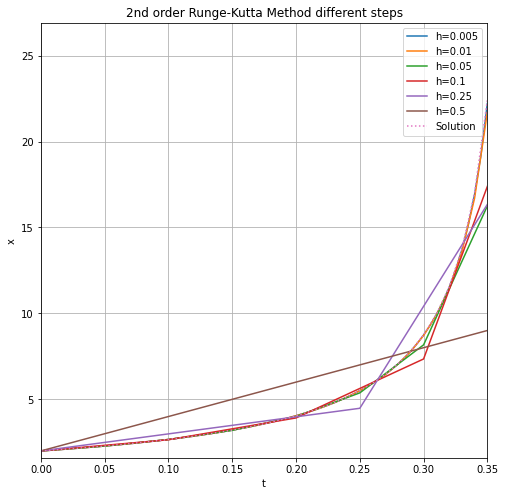

In [18]:
StabilityAnalysis(Runge2, H1, t0, tn, x0, equation1, solution1)

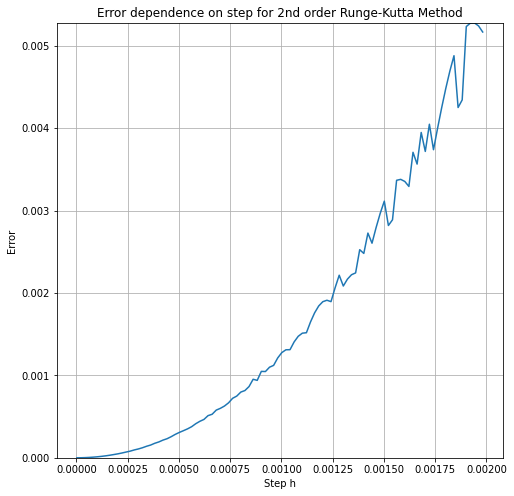

In [19]:
Error(Runge2, H2_2, t0, tn, x0, equation1, solution1)

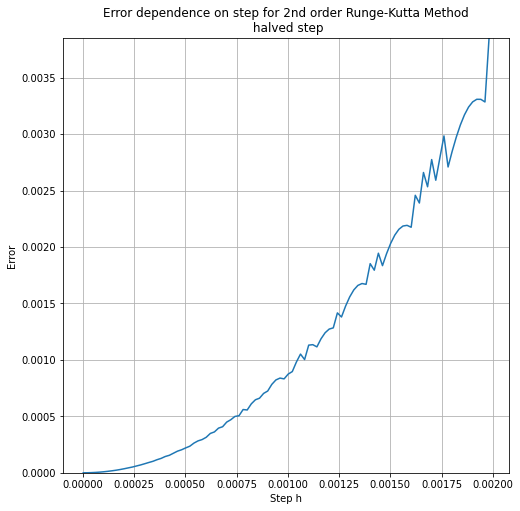

In [20]:
Errorh2(Runge2, H2_2, t0, tn, x0, equation1, solution1)

Бачимо, що оскільки даний метод є методом 2-гого порядку, тому він у рази точніший у порівнянні із методами Ейлера.

### Метод Рунге-Кути 4-гого порядку

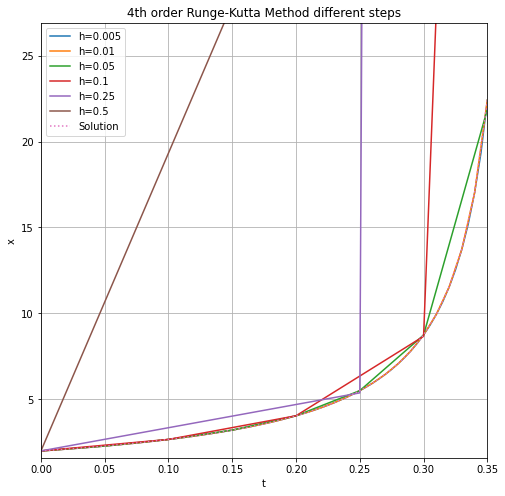

In [21]:
StabilityAnalysis(Runge4, H1, t0, tn, x0, equation1, solution1)

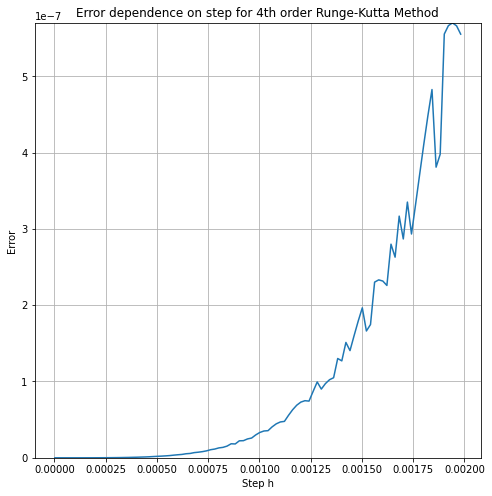

In [22]:
Error(Runge4, H2_2, t0, tn, x0, equation1, solution1)

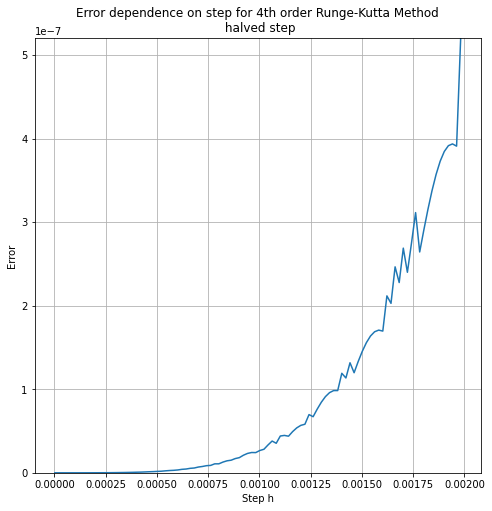

In [23]:
Errorh2(Runge4, H2_2, t0, tn, x0, equation1, solution1)

Метод Рунге-Кути 4-го порядку має ще більшу стійкість, на кожному кроці наближеня все краще і краще, проте бачимо, що в певній точці метод може давати неточний результат, можливо, це пов'язано із тим, що ми наближаємось до точки розриву

### Явний метод Адамса 2-гого порядку

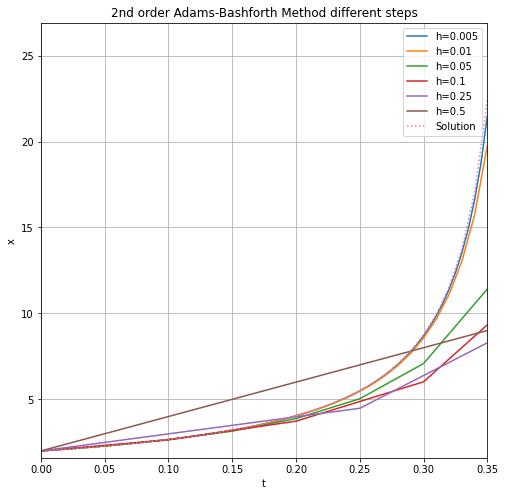

In [24]:
StabilityAnalysis(Adams2E, H1, t0, tn, x0, equation1, solution1)

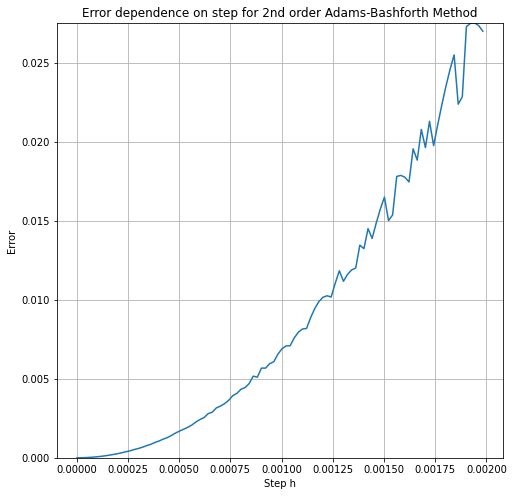

In [25]:
Error(Adams2E, H2_2, t0, tn, x0, equation1, solution1)

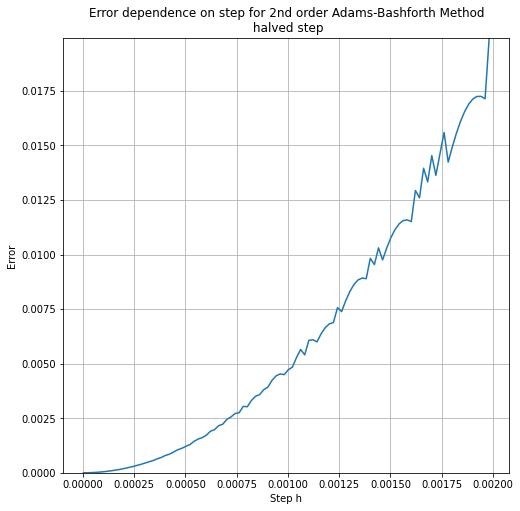

In [26]:
Errorh2(Adams2E, H2_2, t0, tn, x0, equation1, solution1)

### Неявний метод Адамса 2-гого порядку
$$ x'(t) = (1+x^2)e^{t} $$
$$ x(0) = 2, t \in [0;2] $$
#### Робоча формула для неявного Адамса
$$ x_{k+1} = x_{k} + \frac{h}{2}(f_{k+1} + f_{k}) $$
$$ x_{k+1} = x_{k} + \frac{h}{2}((1+x_{k+1}^2)e^t + f_{k}) $$
$$ \frac{h}{2}e^tx_{k+1}^2 - x_{k+1} + (\frac{h}{2}(e^t + f_k) + x_k) = 0 $$

$$ x_{k+1} = \frac{1-\sqrt{1-he^t(h(e^t+f_k)+2x_k)}}{he^t} $$

In [29]:
#Робоча формула для неявного Адамса
#f(t[i+2],x[i+1],h,x1[i+1],x1[i],2)
def equation1ImplAdams(t,x,h,x1i1,x1i,k):
    if k==0:
        return equation1(t,x) #Дифрівняння
    if k==1:
        return equation1ImplEuler(t,x,h) #Робоча формула для неявного Ейлера
    u = h * np.exp(t)
    return (1 - np.sqrt(1 - u*(u + h * x1i1 + 2 * x))) / u #Виведена формула

C:\Users\kam\AppData\Local\Temp/ipykernel_6136/714912069.py:9: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt(1 - u*(u + h * x1i1 + 2 * x))) / u #Виведена формула
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/714912069.py:9: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt(1 - u*(u + h * x1i1 + 2 * x))) / u #Виведена формула
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)
C:\Users\kam\AppData\Local\Temp/ipykernel_6136/3380984753.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.sqrt((1-4*u*(x+u))))/(2*u)


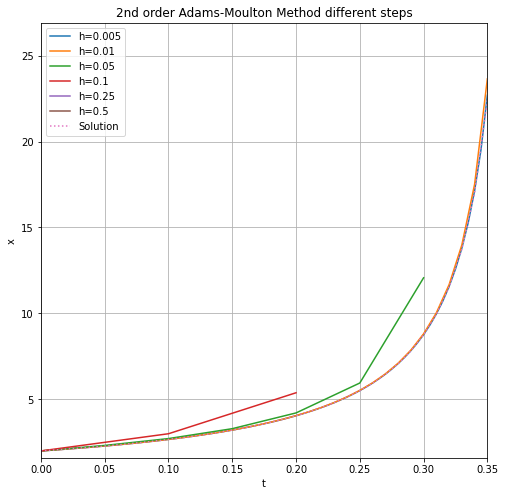

In [30]:
StabilityAnalysis(Adams2I, H1, t0, tn, x0, equation1ImplAdams, solution1)

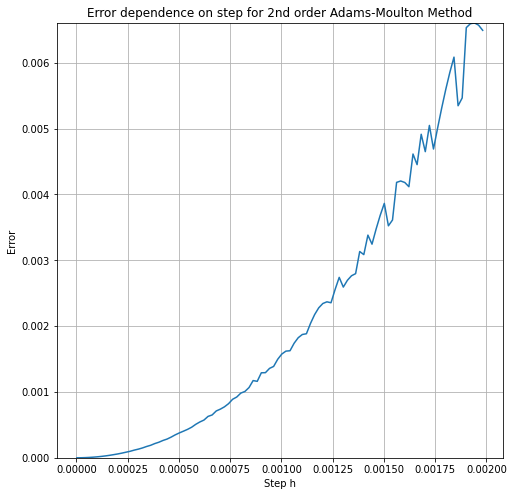

In [31]:
Error(Adams2I, H2_2, t0, tn, x0, equation1ImplAdams, solution1)

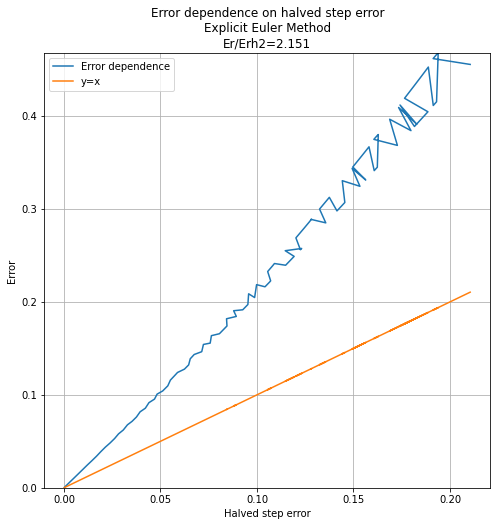

In [32]:
Errors(ExplEuler, H2_2, t0, tn, x0, equation1, solution1)

Бачимо, що метод ще більш точний, проте у порівнянні із попередніми методами, проте як і неявний метод Ейлера він має обмеження через наявність знаку кореня.